# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install folium
!pip install sklearn
!pip install pickle
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 114.7 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 109.4 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 94.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 139.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 43.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 148.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 137.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip ins

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pickle
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [4]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')
df_raw

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                    12.749771  ...         3644                 12.9   
1                    11.564429  ...        14692                 12.0   
2                    12.865239  ...         2373                 19.7   
3                    13.897321  ...         1789                 14.1   
4                    11.901798  ...         4661                 13.5   
...                        ...  ...          ...                  ...   
3135                 15.277229  ...         2098                  8.9   
3136                 17.733200  ...          928                  7.2   
3137                 13.311001  ...         1163                 10.4   
3138                 11.452124  ...          506                 11.3   
3139                 13.004162  ...          480                 11.7   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                      11.9                   13.8             5462   
1                      11.0                   13.1            20520   
2                      18.6                   20.6             3870   
3                      13.2                   14.9             2511   
4                      12.6                   14.5             6017   
...                     ...                    ...              ...   
3135                    8.3                    9.6             2834   
3136                    6.5                    8.0             1360   
3137                    9.5                   11.2             1500   
3138                   10.3                   12.1              686   
3139                   10.7                   12.7              644   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0                3.1               2.9               3.3        1326   
1                3.2               3.0               3.5        5479   
2                4.5               4.2               4.8         887   
3                3.3               3.1               3.6         595   
4                3.4               3.2               3.7        1507   
...              ...               ...               ...         ...   
3135             2.6               2.4               2.8         821   
3136             2.4               2.2               2.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
df_raw.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

         COPD_number  diabetes_prevalence  diabetes_Lower 95% CI  \
count    3140.000000          3140.000000            3140.000000   
mean     5827.242357            13.073503              12.088089   
std     15720.551934             2.724351               2.622948   
min         7.000000             6.100000               5.500000   
25%       815.000000            11.200000              10.300000   
50%      1963.500000            12.800000              11.800000   
75%      4727.000000            14.800000              13.700000   
max    434075.000000            25.600000              24.200000   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count            3140.000000      3140.000000     3140.000000   
mean               14.053726      9326.577707        3.446242   
std                 2.824828     29754.601185        0.568059   
min                 6.700000        11.000000        1.800000   
25%                12.100000      1187.750000        3.100000   
50%                13.800000      2743.000000        3.400000   
75%                15.900000      6679.250000        3.800000   
max                27.000000    952335.000000        6.200000   

       CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  Urban_rural_code  
count       3140.000000       3140.000000    3140.000000       3140.000000  
mean           3.207516          3.710478    2466.234076          4.635350  
std            0.527740          0.613069    7730.422067          1.510447  
min            1.700000          1.900000       3.000000          1.000000  
25%            2.900000          3.300000     314.750000          3.000000  
50%            3.200000          3.700000     718.000000          5.000000  
75%            3.500000          4.100000    1776.250000          6.000000  
max            5.800000          6.600000  237766.000000          6.000000  

[8 rows x 106 columns]

In [9]:
pd.options.display.max_columns=200
pd.options.display.max_rows=40
df_raw.head(10)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   
5  1011    10138   1198               11.816926    1130   
6  1013    19680   2351               11.946138    2461   
7  1015   114277  13141               11.499252   14637   
8  1017    33615   3869               11.509743    3812   
9  1019    26032   2554                9.811002    2981   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   
5                 11.146183   1395                 13.760110   1446   
6                 12.505081   2286                 11.615854   2337   
7                 12.808352  15463                 13.531157  13865   
8                 11.340176   4380                 13.029897   3734   
9                 11.451291   2852                 10.955747   2504   

   30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                 12.749771   7582                 13.636445   7738   
1                 11.564429  27338                 12.539102  29986   
2                 12.865239   3074                 12.354809   3278   
3                 13.897321   3038                 13.562500   3115   
4                 11.901798   7474                 12.921853   7844   
5                 14.263168   1274                 12.566581   1356   
6                 11.875000   2318                 11.778455   2491   
7                 12.132800  13727                 12.012041  15325   
8                 11.108136   4078                 12.131489   4761   
9                  9.618931   3204                 12.307929   3873   

   50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
0                 13.917016   5826                 10.478229   4050   
1                 13.753658  29932                 13.728890  20936   
2                 13.174712   3076                 12.362847   2244   
3                 13.906250   2545                 11.361607   1723   
4                 13.561549   6965                 12.041840   4931   
5                 13.375419   1219                 12.024068    703   
6                 12.657520   2683                 13.633130   1660   
7                 13.410398  14641                 12.811852   8979   
8                 14.163320   4492                 13.363082   2972   
9                 14.877843   3946                 15.158267   2835   

   70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
0                  7.284042  2014                3.622237            42660   
1                  9.602701  9368                4.296814           190301   
2                  9.018930  1048                4.212049            12209   
3                  7.691964   785                3.504464            17211   
4                  8.525242  2335                4.036999            55456   
5                  6.934307   417                4.113237             2661   
6                  8.434959  1093                5.553862            10283   
7                  7.857224  4499                3.936925            86026   
8                  8.841291  1517                4.512866            19182   
9                 10.890443  1283                4.928549            24217   

   % White-alone  Black-alone pop  % Black-alone  \
0      76.725239            10915      19.630942   
1      87.285228            19492       8.94

In [10]:
df_raw['fips'].nunique()

3140

In [11]:
df_raw.describe(include='object')

COUNTY_NAME STATE_NAME
count         3140       3140
unique        1841         51
top     Washington      Texas
freq            31        254

In [12]:
df = df_raw.copy()

In [13]:
columns_to_remove = ['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)',
'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 
'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 
'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
'Active General Surgeons per 100000 Population 2018 (AAMC)',
'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
'Total nurse practitioners (2019)','Total physician assistants (2019)',
'Total physician assistants (2019)','Total Hospitals (2019)',
'Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)',
'STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)']

X = df.drop(columns_to_remove, axis=1)
y = df['ICU Beds_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
df_train = pd.concat((X_train, y_train), axis=1)

<AxesSubplot:>

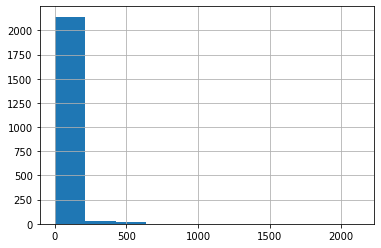

In [15]:
df_train['ICU Beds_x'].hist()

In [16]:
df_train['ICU Beds_x'].describe()

count    2198.000000
mean       24.630118
std        92.161275
min         0.000000
25%         0.000000
50%         0.000000
75%        12.000000
max      2126.000000
Name: ICU Beds_x, dtype: float64

In [17]:
fig = px.box(df_train, x="ICU Beds_x")
fig.show()

In [18]:
n = len(df_train)
n_30 = len(df_train[df_train['ICU Beds_x'] > 30])

print(f'The percentage of counties with more than 30 ICU beds is {round((n_30/n)*100,1)}%')

The percentage of counties with more than 30 ICU beds is 14.5%


In [19]:
n = len(df_train)
n_500 = len(df_train[df_train['ICU Beds_x'] > 500])

print(f'The percentage of counties with more than 500 ICU beds is {round((n_500/n)*100,1)}%')

The percentage of counties with more than 500 ICU beds is 0.8%


<AxesSubplot:>

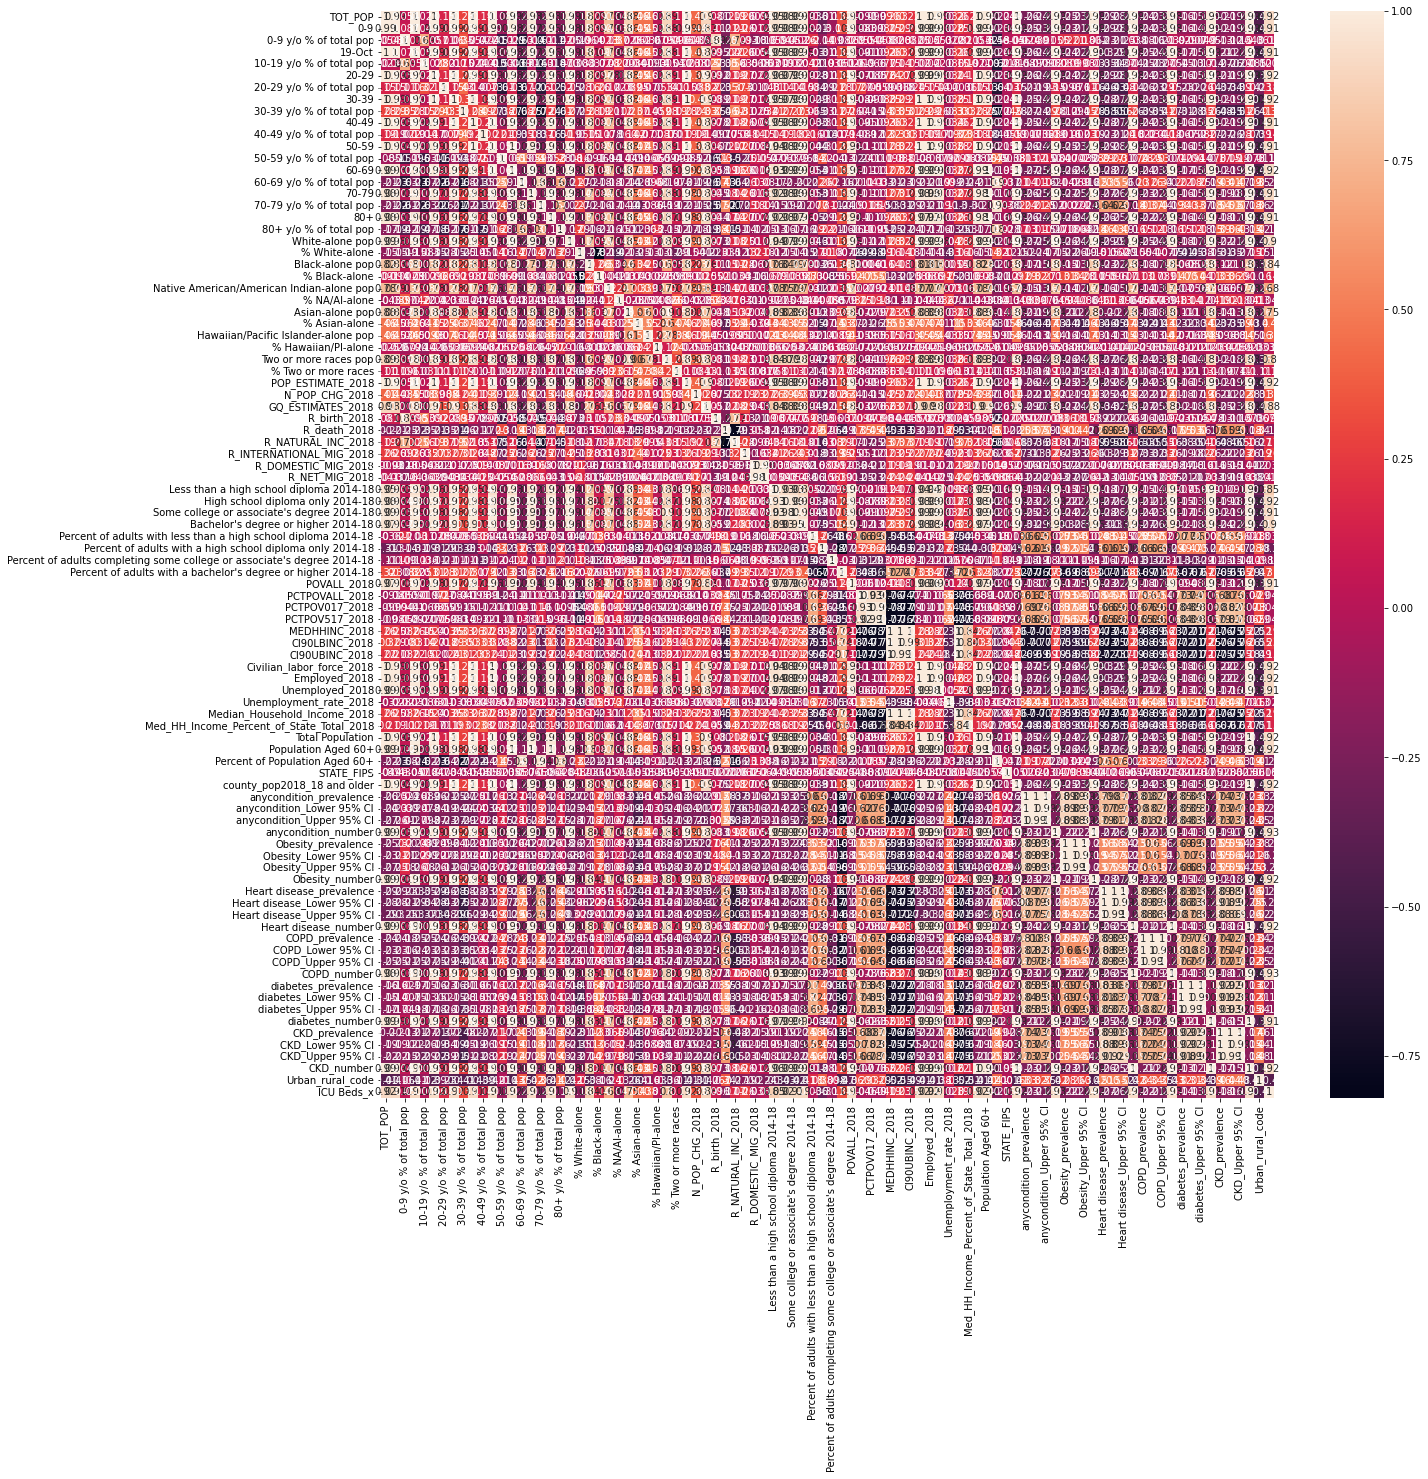

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)

In [23]:
X = df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1)
y = df['Total Specialist Physicians (2019)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
df_train = pd.concat((X_train, y_train), axis=1)

<AxesSubplot:>

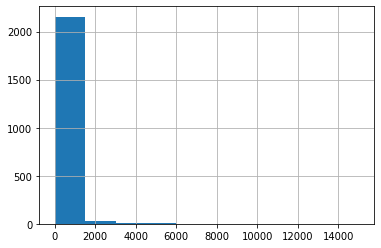

In [25]:
df_train['Total Specialist Physicians (2019)'].hist()

In [26]:
df_train['Total Specialist Physicians (2019)'].describe()

count     2198.000000
mean       169.761103
std        584.398854
min          0.111759
25%         14.656032
50%         37.224822
75%        101.594507
max      15014.048660
Name: Total Specialist Physicians (2019), dtype: float64

In [27]:
fig = px.box(df_train, x='Total Specialist Physicians (2019)')
fig.show()

In [28]:
n = len(df_train)
n_229 = len(df_train[df_train['Total Specialist Physicians (2019)']>229])

print(f'The percentage of counties with more than 229 total specialist physicians is {round((n_229/n)*100,1)}%')

The percentage of counties with more than 229 total specialist physicians is 13.4%


In [29]:
df_train[df_train['Total Specialist Physicians (2019)']>229].describe()

TOT_POP           0-9  0-9 y/o % of total pop        19-Oct  \
count  2.940000e+02  2.940000e+02              294.000000  2.940000e+02   
mean   5.799845e+05  7.197051e+04               12.152984  7.451016e+04   
std    8.506222e+05  1.071639e+05                1.769782  1.075927e+05   
min    9.579600e+04  9.508000e+03                7.323572  1.173600e+04   
25%    2.118598e+05  2.556025e+04               11.050425  2.704750e+04   
50%    3.276695e+05  3.989200e+04               12.029005  4.408550e+04   
75%    6.579215e+05  8.321850e+04               13.150580  8.204375e+04   
max    1.010552e+07  1.208253e+06               18.728795  1.239139e+06   

       10-19 y/o % of total pop         20-29  20-29 y/o % of total pop  \
count                294.000000  2.940000e+02                294.000000   
mean                  12.973870  8.275746e+04                 14.080325   
std                    1.525660  1.278849e+05                  2.987211   
min                    7.734385  1.097300e+04                  8.364775   
25%                   12.152765  2.828175e+04                 12.170204   
50%                   12.906199  4.813100e+04                 13.402483   
75%                   13.845962  9.561625e+04                 14.914011   
max                   18.799350  1.557073e+06                 28.507925   

              30-39  30-39 y/o % of total pop         40-49  \
count  2.940000e+02                294.000000  2.940000e+02   
mean   8.073291e+04                 13.215157  7.355559e+04   
std    1.270430e+05                  1.794859  1.125902e+05   
min    1.104200e+04                  8.200263  1.114900e+04   
25%    2.699775e+04                 12.116741  2.482975e+04   
50%    4.487150e+04                 13.052133  4.090350e+04   
75%    9.434800e+04                 14.175357  8.232475e+04   
max    1.501844e+06                 20.761954  1.350076e+06   

       40-49 y/o % of total pop         50-59  50-59 y/o % of total pop  \
count                294.000000  2.940000e+02                294.000000   
mean                  12.324720  7.526175e+04                 13.183757   
std                    1.202029  1.085094e+05                  1.537718   
min                    8.499466  1.242700e+04                  7.289947   
25%                   11.555995  2.750900e+04                 12.166681   
50%                   12.239319  4.335850e+04                 13.325442   
75%                   12.964187  8.130600e+04                 14.203478   
max                   16.899594  1.306003e+06                 17.483079   

              60-69  60-69 y/o % of total pop          70-79  \
count  2.940000e+02                294.000000     294.000000   
mean   6.297931e+04                 11.449853   37084.938776   
std    8.573230e+04                  1.900352   49936.297025   
min    1.071800e+04                  5.684709    6519.000000   
25%    2.473075e+04                 10.208372   14541.750000   
50%    3.745600e+04                 11.311630   22459.500000   
75%    6.936300e+04                 12.464331   40330.000000   
max    1.014325e+06                 19.556625  572530.000000   

       70-79 y/o % of total pop            80+  80+ y/o % of total pop  \
count                294.000000     294.000000              294.000000   
mean                   6.816914   21131.901361                3.802421   
std                    1.739016   30083.984308                1.134724   
min                    3.405747    3317.000000                1.772705   
25%                    5.760130    7600.000000                3.032012   
50%                    6.635970   12324.000000                3.655048   
75%                    7.462260   22151.750000                4.407095   
max                   16.686899  356275.000000               10.797529   

       White-alone pop  % White-alone  Black-alone pop  % Black-alone  \
count     2.940000e+02     294.000000     2.940000e+02     294.000000   
mean      4.258095e+05    

In [30]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
df_corr=df_train.corr()

# Model

In [32]:
scaler = StandardScaler()
train_scaler = scaler.fit(X_train)
data_escaled = train_scaler.transform(X_train)
model = Lasso(alpha=10) 
model.fit(data_escaled, y_train)
print('Score Lasso alpha=10:', model.score(data_escaled, y_train)) 

Score Lasso alpha=10: 0.9634293142510064


In [33]:
print('Score in test data - Lasso alpha=10:', model.score(train_scaler.transform(X_test), y_test))

Score in test data - Lasso alpha=10: 0.9410126911558601


In [34]:
pipe = make_pipeline(StandardScaler(), Lasso(alpha=10))
pipe.fit(X_train, y_train)
print(pipe[1].coef_, pipe[1].intercept_)


[  0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -0.         120.04288235   0.           0.
   0.          40.02489302  -0.           0.           0.
   0.           0.          -0.27317371  -0.           0.
  -0.           0.         -14.04127763  86.12477588   0.
  -0.           0.           0.          -0.          -0.
   0.          93.85150917   0.         206.93200178   0.
   0.          -0.           0.           0.          -0.
  -0.          -0.           0.           5.91635079   0.
   0.           0.          40.02458628   0.           0.
   0.           0.           0.          -0.           0.
   0.          -0.          -0.          -0.           0.
  -0.          -0.          -0.           0.          -0.
  -0.          -0.           0.           0.          -0.
   0.           0.          -0.          -0.          -0.
   0.         

In [35]:
coef_list=pipe[1].coef_

In [36]:
loc=[i for i, e in enumerate(coef_list) if e != 0]
loc

[17, 21, 27, 32, 33, 41, 43, 53, 57]

In [37]:
col_name=df_train.columns
col_name[loc]

Index(['80+', 'Black-alone pop', 'Hawaiian/Pacific Islander-alone pop',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18', 'CI90LBINC_2018',
       'Unemployed_2018'],
      dtype='object')

In [38]:
print("Score Lasso with alpha=10 - train: ", pipe.score(X_train, y_train))
print("Score Lasso with alpha=10 - test: ", pipe.score(X_test, y_test))  

Score Lasso with alpha=10 - train:  0.9634293142510064
Score Lasso with alpha=10 - test:  0.9410126911558601


In [39]:
pipe2 = make_pipeline(StandardScaler(), Lasso())
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [40]:
params={
    'lasso__fit_intercept':[True,False],
    'lasso__alpha':10.0**np.arange(-2, 6, 1)
}
gs=GridSearchCV(pipe2,params,n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+06, tolerance: 6.756e+04
  model = cd_fast.enet_coordinate_descent(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+06, tolerance: 6.321e+04
  model = cd_fast.enet_coordinate_descent(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'lasso__fit_intercept': [True, False]})

In [41]:
#building a dataframe from cross-validation data
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

params  split0_test_score  \
4  {'lasso__alpha': 1.0, 'lasso__fit_intercept': ...           0.954888   
2  {'lasso__alpha': 0.1, 'lasso__fit_intercept': ...           0.939916   
0  {'lasso__alpha': 0.01, 'lasso__fit_intercept':...           0.935345   
6  {'lasso__alpha': 10.0, 'lasso__fit_intercept':...           0.942411   
8  {'lasso__alpha': 100.0, 'lasso__fit_intercept'...           0.953124   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.955616           0.967959           0.961836           0.947529   
2           0.958964           0.966818           0.957759           0.946422   
0           0.956971           0.961654           0.954355           0.947207   
6           0.928043           0.952410           0.946235           0.966674   
8           0.875997           0.914548           0.926417           0.926972   

   mean_test_score  std_test_score  rank_test_score  
4         0.957566        0.006899                1  
2         0.953976        0.009580                2  
0         0.951106        0.009163                3  
6         0.947155        0.012627                4  
8         0.919412        0.025105                5

In [42]:
gs.best_params_

{'lasso__alpha': 1.0, 'lasso__fit_intercept': True}

In [43]:
print('Score with alpha selected by CV - test:', gs.score(X_test,y_test))

Score with alpha selected by CV - test: 0.9529549479615388


In [44]:
scores_dict = {'alpha':10.0**np.arange(-2, 6, 1), 'mean_train_scores': list(), 'mean_cv_scores': list()}

for alpha in scores_dict['alpha']:
  pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha)) 
  scores=cross_validate(pipe_lasso, X_train, y_train, return_train_score=True)
  scores_dict['mean_train_scores'].append(scores['train_score'].mean())
  scores_dict['mean_cv_scores'].append(scores['test_score'].mean())


pd.DataFrame(scores_dict)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+06, tolerance: 6.756e+04

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+06, tolerance: 6.321e+04

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.275e+06, tolerance: 6.044e+04

/hom

alpha  mean_train_scores  mean_cv_scores
0       0.01           0.982023        0.951106
1       0.10           0.981688        0.953976
2       1.00           0.976377        0.957566
3      10.00           0.964274        0.947155
4     100.00           0.926540        0.919412
5    1000.00           0.000000       -0.002825
6   10000.00           0.000000       -0.002825
7  100000.00           0.000000       -0.002825

In [45]:
model2 = gs.best_estimator_
model2.fit(X_train, y_train)
print(model2[1].coef_, model2[1].intercept_) 

[-0.00000000e+00  1.82173861e+02  3.15853216e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.11421730e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.26882458e+00  7.90172192e+01
  4.00875672e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.92314139e+02  0.00000000e+00  4.88765966e-01
  3.37918675e+00  4.97313291e+01 -2.45338552e+00 -0.00000000e+00
 -0.00000000e+00  4.99213558e-01 -0.00000000e+00 -5.53327321e+01
  7.65382235e-01  9.39089791e+01 -8.48643648e-01  1.41652000e+00
 -2.47723246e+01  9.55584624e+01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.51000421e+00  2.46697750e+02 -1.89635136e+02  1.33904686e+02
  5.56568590e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.40320656e+01  1.57893651e-01  6.26195662e-01  4.97808378e+00
  0.00000000e+00  2.73617606e+01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.02975871e+02  2.79043009e+00  0.00000000e+00
 -7.44186570e+00  0.00000

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.701e+06, tolerance: 7.503e+04



In [46]:
coef_list=model2[1].coef_
loc2=[i for i, e in enumerate(coef_list) if e != 0]
col_name=df_train.columns

print(col_name[loc2])

Index(['0-9', '0-9 y/o % of total pop', '20-29 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '80+',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop',
       '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018',
       'CI90LBINC_2018', 'Unemployed_2018', 'Unemployment_rate_2018',
       'Med_HH_Income_Percent_of_State_Total_2018',
       'anycondition_Upper 95% CI', 'Obesity_number', 'Heart disease_number',
       'COPD_Upper 95% 

In [47]:
X_ols = X_train[col_name[loc2]]
X_ols_int = sm.add_constant(X_ols) 

modelo_ols = sm.OLS(y_train, X_ols_int)
results = modelo_ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total Specialist Physicians (2019)   R-squared:                       0.980
Model:                                            OLS   Adj. R-squared:                  0.979
Method:                                 Least Squares   F-statistic:                     2805.
Date:                                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                                        22:40:52   Log-Likelihood:                -12843.
No. Observations:                                2198   AIC:                         2.576e+04
Df Residuals:                                    2160   BIC:                         2.598e+04
Df Model:                                          37                                         
Covariance Type:                            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             51.3248     73.379      0.699      0.484     -92.577     195.226
0-9                                                                0.0111      0.001      7.691      0.000       0.008       0.014
0-9 y/o % of total pop                                            -3.3644      1.372     -2.453      0.014      -6.054      -0.674
20-29 y/o % of total pop                                          -1.2352      1.075     -1.149      0.251      -3.342       0.872
40-49 y/o % of total pop                                          -4.2564      1.823     -2.334      0.020      -7.832      -0.681
50-59                                                              0.0155      0.001     12.965      0.000       0.013       0.018
50-59 y/o % of total pop                                          -5.1255      2.267     -2.261      0.024      -9.570      -0.681
80+                                                                0.0247      0.002     13.499      0.000       0.021       0.028
White-alone pop                                                    0.0030      0.001      3.847      0.000       0.001       0.005
% White-alone                                                     -0.6314      0.366     -1.725      0.085      -1.349       0.086
Black-alone pop                                                    0.0034      0.001      4.420      0.000       0.002       0.005
% Black-alone                                                     -0.7657      0.378     -2.025      0.043      -1.507      -0.024
Asian-alone pop                                                    0.0020      0.001      2.671      0.008       0.001       0.003
Hawaiian/Pacific Islander-alone pop                               -0.0196      0.003     -7.061      0.000      -0.025      -0.014
% Hawaiian/PI-alone                                                1.0640      1.919      0.554      0.579      -2.699       4.827
Two or more races pop                                              0.0138      0.002      7.835      0.000       0.010       0.017
% Two or more races                                               -2.2270      1.920     -1.160      0.246      -5.992       1.538
POP_ESTIMATE_2018                                                 -0.0054      0.001     -5.314      0.000      -0.007      -0.003
N_POP_CHG_2018                                                 -4.563e-05      0.001     -0.031      0.975      -0.003       0.003
GQ_ESTIMATES_2018        

In [48]:
filename='../models/final_ols_model.sav'
pickle.dump(modelo_ols, open(filename, 'wb'))

In [49]:
model_lasso = gs.best_estimator_

filename='../models/final_lasso_model.sav'
pickle.dump(model_lasso, open(filename, 'wb'))